In [1]:
library(tidyverse)

devices <- read.csv("Devices.csv")

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.4
v forcats   1.0.0     v stringr   1.5.0
v ggplot2   3.4.4     v tibble    3.2.1
v lubridate 1.9.3     v tidyr     1.3.0
v purrr     1.0.2     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [3]:
summary(devices)
sum(is.na(devices))

       X             Heart           Calories           Steps      
 Min.   :    0   Min.   : 40.00   Min.   : 0.0000   Min.   :  0.0  
 1st Qu.:19646   1st Qu.: 60.00   1st Qu.: 0.1063   1st Qu.:  0.0  
 Median :39292   Median : 69.00   Median : 0.3023   Median :  2.0  
 Mean   :39292   Mean   : 71.58   Mean   : 1.0690   Mean   : 13.3  
 3rd Qu.:58939   3rd Qu.: 79.00   3rd Qu.: 1.1394   3rd Qu.: 15.0  
 Max.   :78585   Max.   :190.00   Max.   :15.8879   Max.   :203.0  
    Distance              Age           Gender              Weight     
 Min.   :  0.00000   Min.   :21.00   Length:78586       Min.   :115.0  
 1st Qu.:  0.00000   1st Qu.:23.00   Class :character   1st Qu.:160.0  
 Median :  0.04219   Median :31.00   Mode  :character   Median :180.0  
 Mean   :  6.59566   Mean   :30.82                      Mean   :179.6  
 3rd Qu.:  6.57657   3rd Qu.:36.00                      3rd Qu.:198.4  
 Max.   :258.79767   Max.   :44.00                      Max.   :238.0  
     Height        A

[1] 0

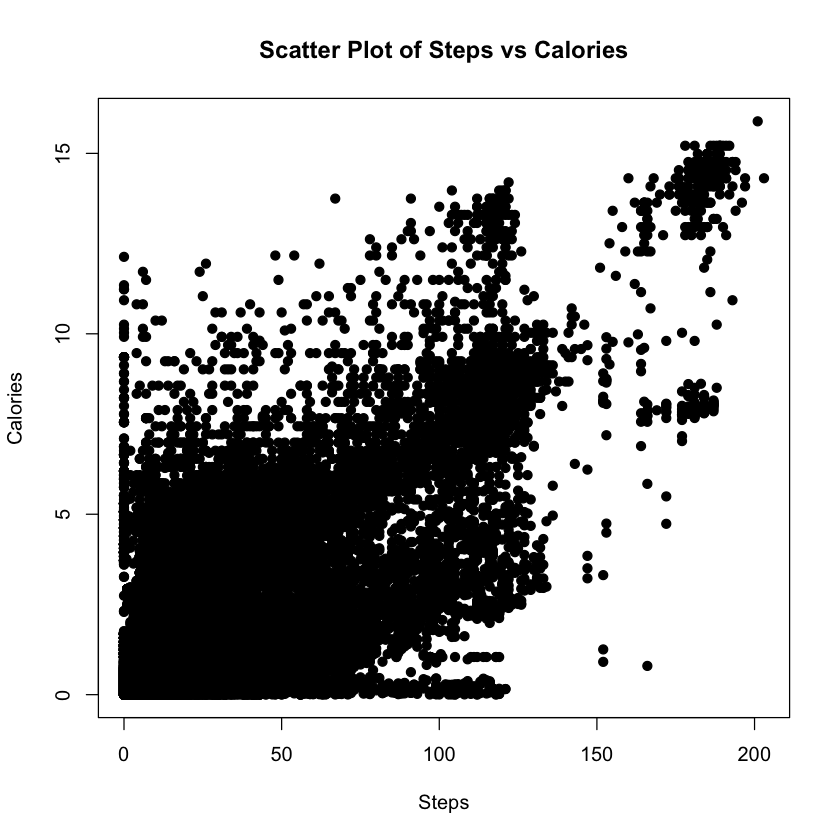

In [4]:
plot(devices$Steps, devices$Calories, main="Scatter Plot of Steps vs Calories", xlab="Steps", ylab="Calories", pch=19)

In [5]:
cor(devices$Steps, devices$Calories, use="complete.obs")

[1] 0.724387

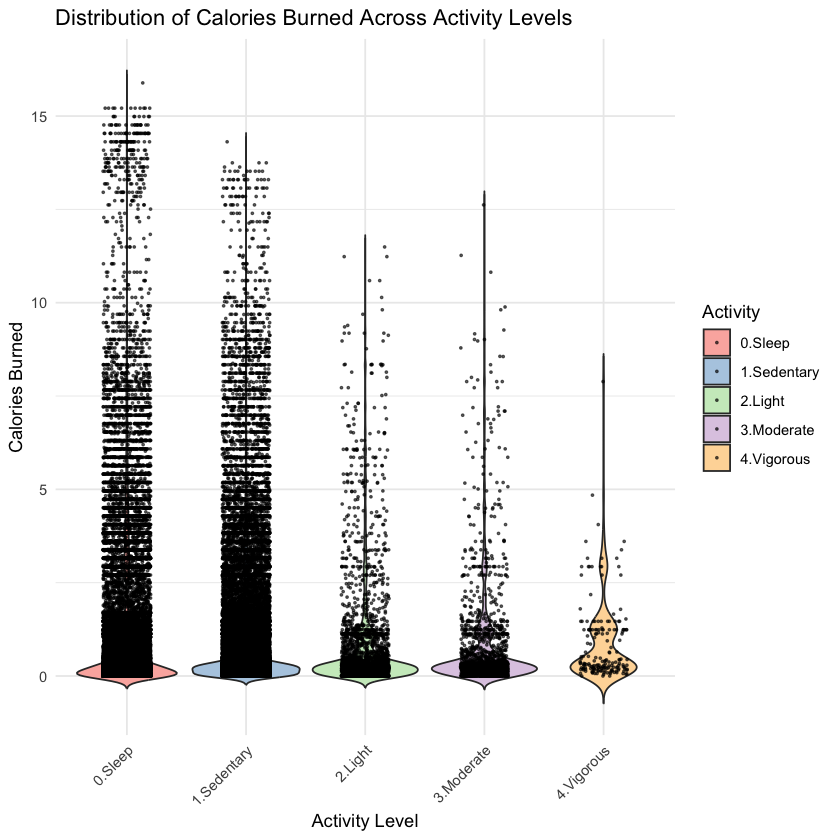

In [6]:
library(ggplot2)

ggplot(devices, aes(x=Activity, y=Calories, fill=Activity)) +
  geom_violin(trim=FALSE) +  # Draw violin plot
  geom_jitter(width=0.2, color="black", size=0.4, alpha=0.6) +  
  labs(title="Distribution of Calories Burned Across Activity Levels",
       x="Activity Level",
       y="Calories Burned") +
  scale_fill_brewer(palette="Pastel1") +  
  theme_minimal() + 
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) 

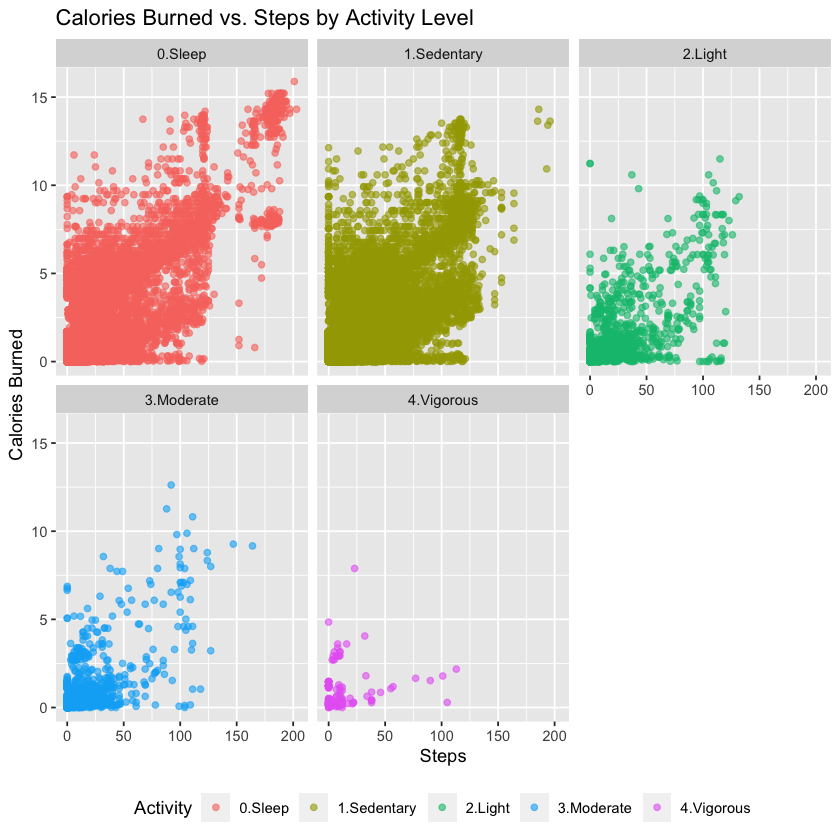

In [9]:
ggplot(devices, aes(x=Steps, y=Calories, color=Activity)) +
  geom_point(alpha=0.6) + 
  facet_wrap(~Activity) + 
  labs(title="Calories Burned vs. Steps by Activity Level",
       x="Steps",
       y="Calories Burned") +
  theme(legend.position="bottom")


Attaching package: 'reshape2'


The following object is masked from 'package:tidyr':

    smiths




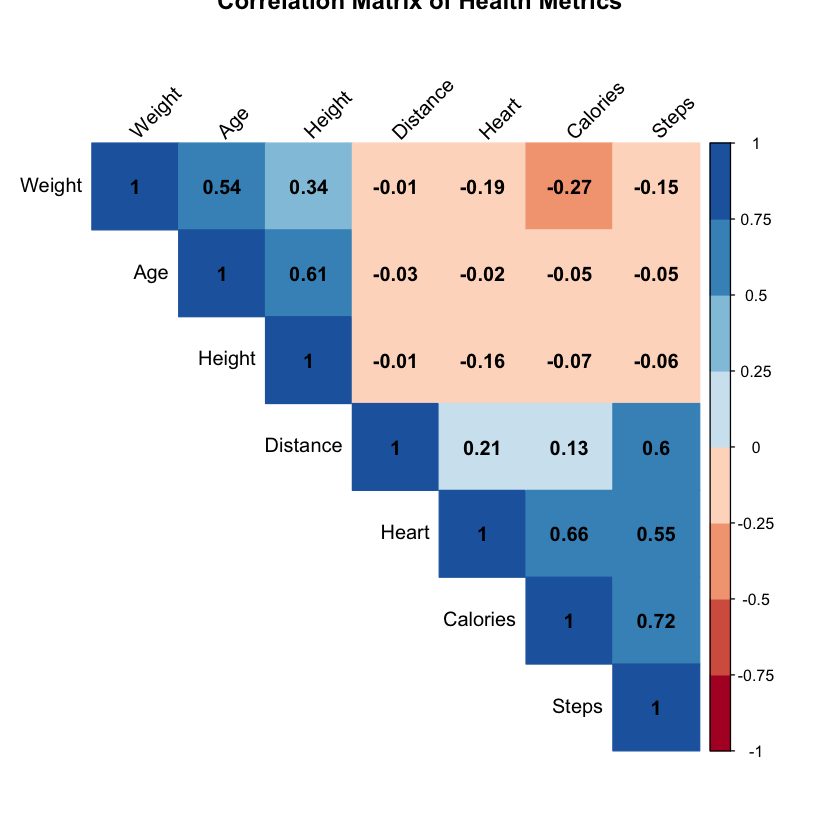

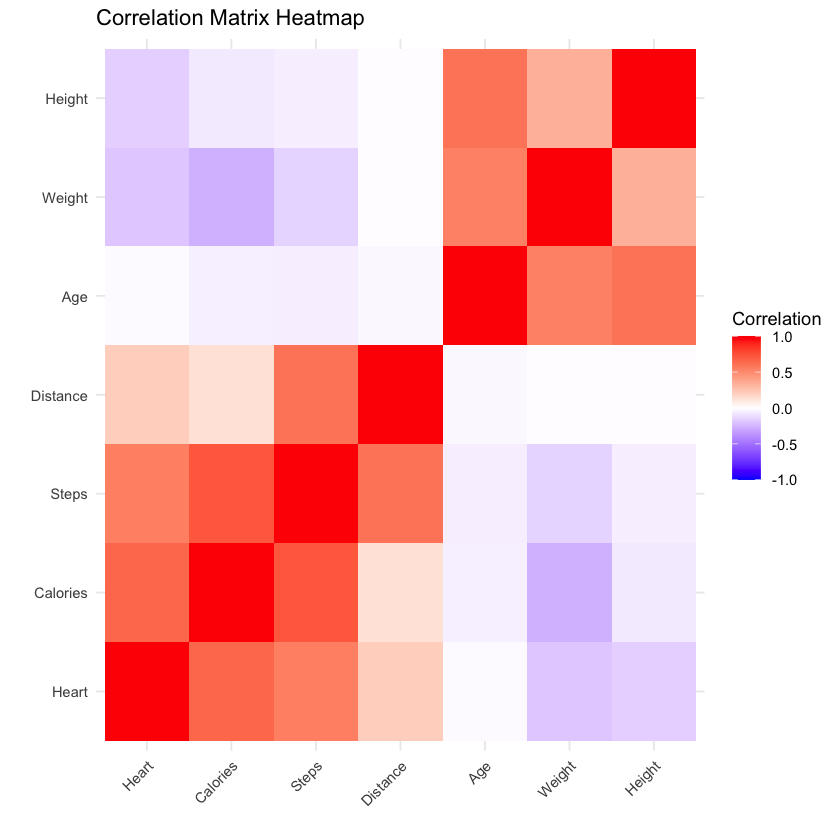

In [12]:
library(corrplot)
library(RColorBrewer)

numerical_data <- devices[,c('Heart', 'Calories', 'Steps', 'Distance', 'Age', 'Weight', 'Height')]

cor_matrix <- cor(numerical_data, use="complete.obs")  

corrplot(cor_matrix, method="color", type="upper", order="hclust",
         tl.col="black", tl.srt=45, 
         addCoef.col="black", 
         col=brewer.pal(n=8, name="RdBu"), 
         title="Correlation Matrix of Health Metrics")

library(reshape2)  
melted_cor_matrix <- melt(cor_matrix)
ggplot(melted_cor_matrix, aes(Var1, Var2, fill=value)) +
  geom_tile() +
  scale_fill_gradient2(low="blue", high="red", mid="white", midpoint=0, limit=c(-1,1)) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1)) +
  labs(title="Correlation Matrix Heatmap", x="", y="", fill="Correlation")

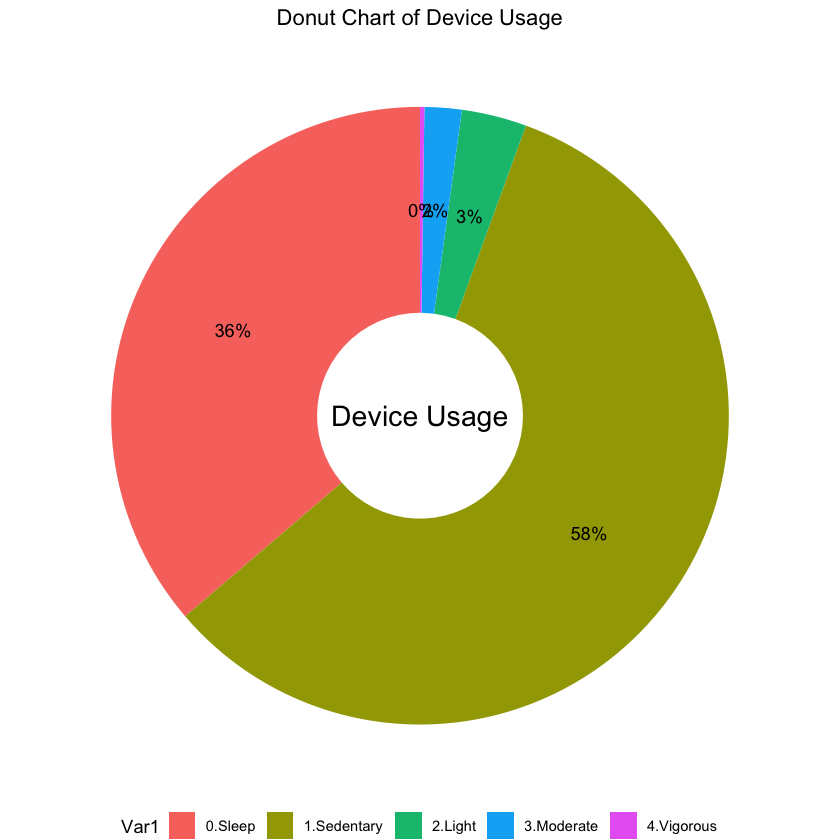

In [14]:
device_counts <- as.data.frame(table(devices$Activity))

donut_plot <- ggplot(device_counts, aes(x="", y=Freq, fill=Var1)) +
  geom_bar(width = 1, stat = "identity") +
  coord_polar(theta = "y") + 
  labs(title="Donut Chart of Device Usage", x=NULL, y=NULL) +
  theme_void() 


donut_plot + 
  theme(axis.text.x = element_blank()) +  
  annotate("text", x = 0, y = 0, label = "Device Usage", size = 6, color = "black") + 
  geom_text(aes(label=scales::percent(Freq/sum(Freq), accuracy = 1)), position = position_stack(vjust = 0.5)) +  
  theme(plot.title = element_text(hjust = 0.5)) + 
  theme(legend.position = "bottom")